<a href="https://colab.research.google.com/github/easyhardhoon/data_analysis_with_stats/blob/main/DA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 시각화(1)

**1. 리스트 성분 분석**

✈단순 코드

In [ ]:
values = [5,5,3,1,1,2,1,2,1,3,3,4,5,5]
hist = {}
for x in values:
 hist[x] = hist.get(x,0)+1 #hist.get(x,0)을 함으로써 최초선언에도 유효
 #hist[x] = hist[x]+1  # 최초선언에서 에러
hist

{1: 4, 2: 2, 3: 3, 4: 1, 5: 4}

✈counter 모듈

In [ ]:
from collections import Counter
counter = Counter(values)
counter 
#위의 과정을 함수로 구현

Counter({1: 4, 2: 2, 3: 3, 4: 1, 5: 4})

✈groupby 모듈

In [ ]:
from itertools import groupby
{key : group for key, group in groupby(sorted(values))}
#groupby는 정렬한 상태로 써야하며 값이 아니라 iterator를 반환한다

{1: <itertools._grouper at 0x7f04054e0610>,
 2: <itertools._grouper at 0x7f04054e06d0>,
 3: <itertools._grouper at 0x7f04054e0710>,
 4: <itertools._grouper at 0x7f04054e07d0>,
 5: <itertools._grouper at 0x7f04054e0810>}

In [ ]:
from itertools import groupby
{key : len(list(group)) for key, group in groupby(sorted(values))}

{1: 4, 2: 2, 3: 3, 4: 1, 5: 4}

✈numpy

In [ ]:
import numpy as np
hist = {key:val for key,val in enumerate(np.bincount(values))}
hist

{0: 0, 1: 4, 2: 2, 3: 3, 4: 1, 5: 4}

⏰위 case들의 속도 test

In [ ]:
import random
import time
long_values = [random.uniform(1, 10) for _ in range(10000000)]

start = time.time()
hist = {}
for x in long_values:
    hist[x] = hist.get(x, 0) + 1
print("For loop: ", time.time() - start)

start = time.time()
counter = Counter(long_values)
print("collections.Counter: ", time.time() - start)

start = time.time()
hist = {key: len(list(group)) for key, group in groupby(sorted(long_values))}
print("itertools.groupby: ", time.time() - start)

sorted_long_values = sorted(long_values)
start = time.time()
hist = {key: len(list(group)) for key, group in groupby(sorted_long_values)}
print("itertools.groupby sorted values: ", time.time() - start)

start = time.time()
hist = {key: val for key, val in enumerate(np.bincount(long_values))}
print("numpy bincount: ", time.time() - start)
#결론. numpy가 압도적으로 빠름.c언어 베이스

For loop:  8.555532932281494
collections.Counter:  5.577601194381714
itertools.groupby:  19.93885040283203
itertools.groupby sorted values:  14.24288296699524
numpy bincount:  1.3484606742858887


**2. 데이터 시각화(예제)**

In [ ]:
long_values = [random.uniform(1, 10) for _ in range(100)] # 언더스코어 대신 i을 해도 노상관
hist = {key: val for key, val in enumerate(np.bincount(long_values)) if val != 0}
print(hist.items())
for key, val in sorted(hist.items()): #keys 혹은 items을 통해 dict의 iteration 구현
    print(key, val)

dict_items([(1, 13), (2, 13), (3, 13), (4, 11), (5, 11), (6, 12), (7, 7), (8, 7), (9, 13)])
1 13
2 13
3 13
4 11
5 11
6 12
7 7
8 7
9 13


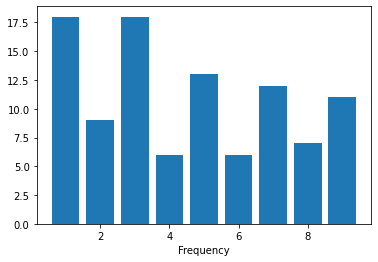

In [ ]:
from matplotlib import pyplot as plt
plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value")
plt.xlabel("Frequency")
plt.show()

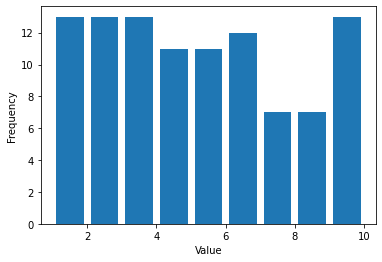

In [ ]:
from matplotlib import pyplot as plt
plt.hist(long_values,bins = range(1,11), rwidth= 0.8) #long_values에 대한 hist를 그린다
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

**3. 데이터 시각화(실습)**

In [2]:
import pandas as pd
preg = pd.read_csv("./2002FemPreg.tsv", sep="\t")
live = preg[preg.outcome==1]

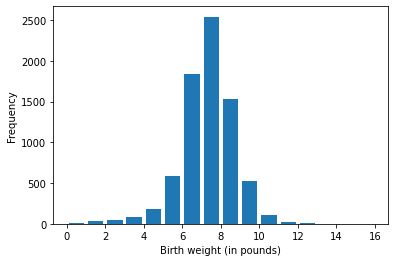

In [ ]:
from matplotlib import pyplot as plt
hist = plt.hist(live["birthwgt_lb"], rwidth = 0.8, label="birthwgt_lb", bins = range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max()+2)))
plt.xlabel("Birth weight (in pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

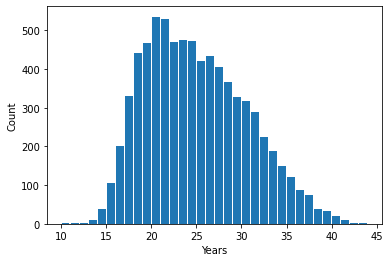

In [ ]:
#hist를 그리는 형식이 다른 것 같다.
hist = live["agepreg"].plot.hist(rwidth=0.8,
                                 bins=range(int(live["agepreg"].min()), int(live["agepreg"].max()+1)))
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

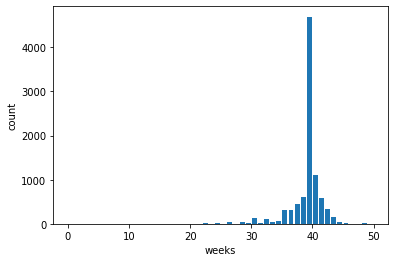

In [11]:
from matplotlib import pyplot as plt

#이처럼 hist를 선언하는 방식은 2가지가 있습니다. 하나는 plt 제공방법, 하나는 수동방법
#hist = plt.hist(live["prglngth"], rwidth = 0.8, label="prglngth", bins = range(int(live["prglngth"].min()), int(live["prglngth"].max()+2)))
hist = live["prglngth"].plot.hist(rwidth=0.8,\
                                bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
plt.xlabel("weeks")
plt.ylabel("count")
plt.show()
plt.close()

In [20]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1166.0,NaN,1157.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,NaN,1.0,1156.0,NaN,1147.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,9.0,2.0,NaN,2.0,2.0,0.0,NaN,1.0,1.0,4.0,NaN,1156.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1198.0,NaN,1189.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1204.0,NaN,1195.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [30]:
#가장 작은 값  10개의 빈도 추출
live.groupby("prglngth").count().sort_index()[0:10]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
prglngth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
9,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
13,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
17,2,2,0,0,0,0,2,0,2,0,0,2,2,0,2,0,0,2,2,2,2,0,0,0,2,0,0,2,2,2,0,0,0,0,0,0,0,0,0,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2
18,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
19,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
20,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
21,2,2,0,0,0,0,2,0,2,0,0,2,2,0,2,0,0,2,2,2,2,0,0,0,2,0,0,2,2,2,0,0,0,0,0,0,0,0,0,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2


In [31]:
#위의 prglngth별 sort한 값들에서 caseid 칼럼값만 가지고 오겠다.
live.groupby("prglngth").count()["caseid"].sort_index()[0:10]

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: caseid, dtype: int64

In [32]:
live.groupby("prglngth").count().sort_index()[-10:]
#이렇게 prglngth를 groupby로 count를 하다보니 같은 값이 누적되면 전체 칼럼 값들이 합쳐지는 모습.

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
prglngth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40,1116,1116,0,0,0,0,1116,0,1116,9,0,1116,1116,0,1115,0,0,1116,1116,1116,1116,0,0,0,1116,4,0,1116,1111,1109,6,9,9,8,1,1,1,1,1,1116,...,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,0,1109
41,587,587,0,0,0,0,587,1,587,3,0,587,587,0,587,0,0,587,587,587,587,0,0,0,587,2,0,587,587,587,0,3,3,3,0,0,0,0,0,587,...,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,0,587
42,328,328,0,0,0,0,328,0,328,1,0,328,328,0,328,0,0,328,328,328,328,0,0,0,328,0,0,328,328,326,0,1,1,1,0,0,0,0,0,328,...,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,0,326
43,148,148,0,0,0,0,148,0,148,0,0,148,148,0,148,0,0,148,148,148,148,0,0,0,148,0,0,148,148,148,0,0,0,0,0,0,0,0,0,148,...,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,0,148
44,46,46,0,0,0,0,46,0,46,0,0,46,46,0,46,0,0,46,46,46,46,0,0,0,46,0,0,46,46,46,0,0,0,0,0,0,0,0,0,46,...,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0,46
45,10,10,0,0,0,0,10,0,10,0,0,10,10,0,10,0,0,10,10,10,10,0,0,0,10,0,0,10,10,10,0,0,0,0,0,0,0,0,0,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10
46,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
47,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
48,7,7,0,0,0,0,7,0,7,0,0,7,7,0,7,0,0,7,7,7,7,0,0,0,7,0,0,7,7,7,0,0,0,0,0,0,0,0,0,7,...,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,7


In [15]:
#가장 큰 값 10개의 빈도 추출
live.groupby("prglngth").count()["caseid"].sort_index()[-10 :]
#live.groupby("prglngth").count()["caseid"].sort_index(ascending=False)[0:10]
#위 두 코드는 같은 뜻입니다.

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: caseid, dtype: int64

✅위 코드들의 의미

기본적으로 default로 caseid 항목 값을 y축 값으로 인지하여 그래프로 표현하는 모습.

위 그래프의 양끝값들을 불러오는 코드에 해당.

---



✔첫째 아이와 나머지 아이를 구분하여 데이터 시각화

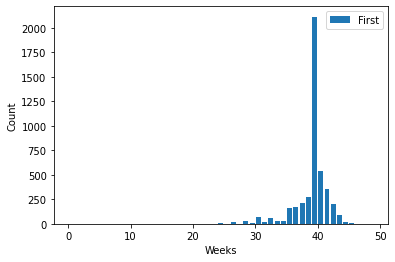

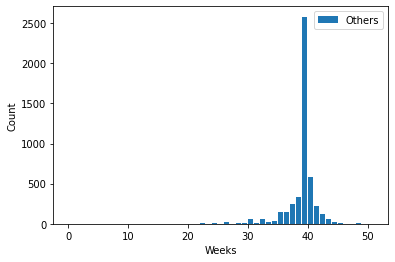

In [33]:
firsts = live[live.birthord ==1 ] #데이터 분리
others = live[live.birthord != 1]
hist = firsts["prglngth"].plot.hist(rwidth = 0.8, label = "First", bins = range(int(live["prglngth"].min()), int(live["prglngth"].max())))
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

hist = others["prglngth"].plot.hist(rwidth=0.8, label="Others",
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+2)))
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

두 개를 한번에

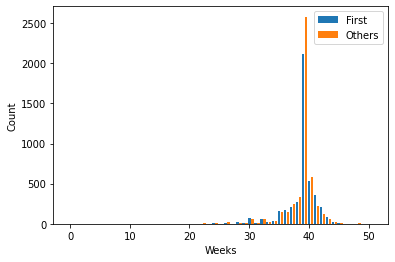

In [34]:
hist = firsts["prglngth"].plot.hist(rwidth=0.45, label="First", align="left",
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+2)))
hist2 = others["prglngth"].plot.hist(rwidth=0.45, label="Others", align="mid", 
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+2)))

plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()